# Simple design
Here we attempt to do the simplest possible modelling, which just tries to model new side chains at random that improve the total energy. We use the simple villin headpiece subdomain as an example. Here, the specifics for repeat proteins are not required.

In [66]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
from repeatdesigner import designer as rd

In [68]:
villin_des = rd.Design(pdb="pdbs/1vii.pdb")

In [69]:
print villin_des.pdb, villin_des.name

pdbs/1vii.pdb pdbs/1vii


In [70]:
mc_villin = rd.MonteCarlo(beta=1./50, len_mc=10)

In [71]:
mdl, ener_mc = rd.run_mc(design=villin_des, mc=mc_villin)

>> Model assessment by DOPE potential
DOPE score               : -2295.814697

 Iteration : 0, 35, ILE
>> Model assessment by DOPE potential
DOPE score               : -2310.004395
### ACCEPT ###

 Iteration : 1, 35, ILE
>> Model assessment by DOPE potential
DOPE score               : -2315.577881
### ACCEPT ###

 Iteration : 2, 13, MET
>> Model assessment by DOPE potential
DOPE score               : -2318.144775
### ACCEPT ###

 Iteration : 3, 1, TYR
>> Model assessment by DOPE potential
DOPE score               : -2349.473145
### ACCEPT ###

 Iteration : 4, 6, VAL
>> Model assessment by DOPE potential
DOPE score               : -2447.447998
### ACCEPT ###

 Iteration : 5, 35, ARG
>> Model assessment by DOPE potential
DOPE score               : -2376.440186
### ACCEPT ###

 Iteration : 6, 4, TYR
>> Model assessment by DOPE potential
DOPE score               : -2485.656982
### ACCEPT ###

 Iteration : 7, 29, ILE
>> Model assessment by DOPE potential
DOPE score               : -2453.263

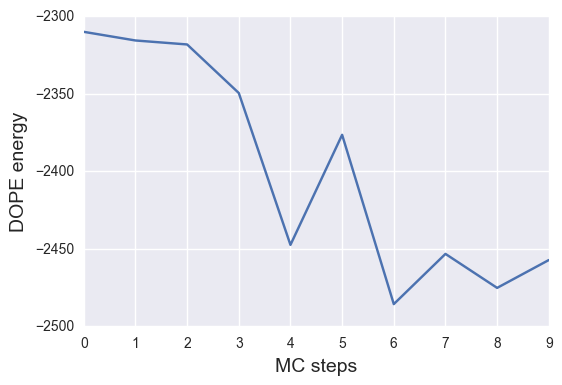

In [72]:
fig, ax = plt.subplots()
ax.plot(ener_mc)

ax.set_ylabel('DOPE energy', fontsize=14)
ax.set_xlabel('MC steps', fontsize=14)

In [64]:
import Bio.PDB
import Bio.Seq
import Bio.SeqUtils
import Bio.pairwise2
import Bio.SeqRecord
import Bio.Align.AlignInfo
parser = Bio.PDB.PDBParser()
initial = parser.get_structure("old", "data/initial.pdb")
final = parser.get_structure("new", "data/old.pdb")
seq_initial= Bio.Seq.Seq(''.join([Bio.SeqUtils.seq1(x.get_resname()) for x in initial.get_residues()]))
seq_final = Bio.Seq.Seq(''.join([Bio.SeqUtils.seq1(x.get_resname()) for x in final.get_residues()]))
#alignments = Bio.pairwise2.align.globalms(seq_initial, seq_final, 2, -1, -5, -1)
print seq_initial
print seq_final
print
a1 = Bio.SeqRecord.SeqRecord(seq_initial)
a2 = Bio.SeqRecord.SeqRecord(seq_final)
align =  Bio.Align.MultipleSeqAlignment([a1,a2])
summary_align = Bio.Align.AlignInfo.SummaryInfo(align)
print summary_align.dumb_consensus(threshold=(0.7))
print summary_align.dumb_consensus(threshold=(0.5))

MLSDEDFKAVFGMTRSAFANLPLWKQQNLKKEKGLF
MLKDGLFKAVFIMTREAFFNLPLWKQQGLKKSKGLF

MLXDXXFKAVFXMTRXAFXNLPLWKQQXLKKXKGLF
MLXDXXFKAVFXMTRXAFXNLPLWKQQXLKKXKGLF


In [65]:
align.

SyntaxError: invalid syntax (<ipython-input-65-1cb687b07734>, line 1)